In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss, accuracy_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_selector

In [2]:
glass = pd.read_csv("D:/Training/Academy/ML(Python)/Cases/Glass_Identification/Glass.csv")
X, y = glass.drop('Type', axis=1), glass['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                   stratify=y)

In [5]:
gbm = GradientBoostingClassifier(random_state=25)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print( f1_score(y_test, y_pred, average='macro') )

0.7363826232247285


In [6]:
trees = [50, 100, 150, 200]
rates = [0.01, 0.1, 0.2, 0.5, 0.8]
depths = [None, 2, 3, 4, 5]
scores = []
for t in tqdm(trees):
    for d in depths:
        for r in rates:
            gbm = GradientBoostingClassifier(random_state=25,
                                             max_depth=d, learning_rate=r, n_estimators=t)
            gbm.fit(X_train, y_train)
            y_pred = gbm.predict(X_test)
            scores.append([t, d, r, f1_score(y_test, y_pred, average='macro')])
df_scores = pd.DataFrame( scores, columns=['trees','depth','learning rate','score'] )
df_scores.sort_values('score', ascending=False)

100%|██████████| 4/4 [01:17<00:00, 19.31s/it]


,trees,depth,learning rate,score
31,100,2.0,0.10,0.779074
81,200,2.0,0.10,0.771909
56,150,2.0,0.10,0.771909
32,100,2.0,0.20,0.765440
57,150,2.0,0.20,0.757599
...,...,...,...,...
89,200,3.0,0.80,0.561329
14,50,3.0,0.80,0.561329
39,100,3.0,0.80,0.561329
5,50,2.0,0.01,0.495520


Feature Importance

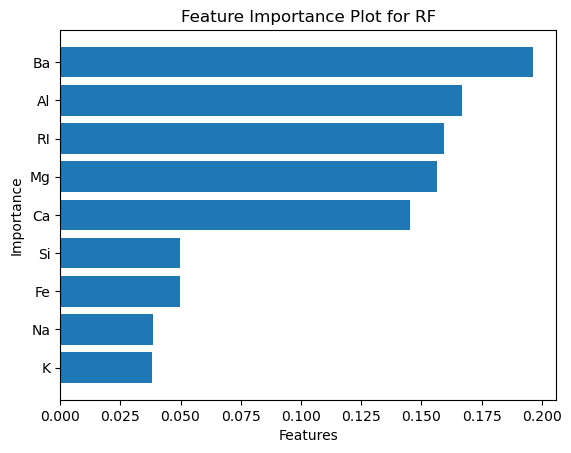

In [7]:
best_model = GradientBoostingClassifier(random_state=25,
                                             max_depth=2, learning_rate=0.1, n_estimators=100)
best_model.fit(X, y)
df_imp = pd.DataFrame({'Feature':list(X.columns), 'Importance': best_model.feature_importances_}) 
df_imp = df_imp.sort_values('Importance')
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title('Feature Importance Plot for RF')
plt.show()

                                                 name     role        type  \
0                                           Bankrupt?   Target     Integer   
1    ROA(C) before interest and depreciation befor...  Feature  Continuous   
2              ROA(A) before interest and % after tax  Feature  Continuous   
3    ROA(B) before interest and depreciation after...  Feature  Continuous   
4                              Operating Gross Margin  Feature  Continuous   
..                                                ...      ...         ...   
91                                Liability to Equity  Feature  Continuous   
92                 Degree of Financial Leverage (DFL)  Feature  Continuous   
93   Interest Coverage Ratio (Interest expense to ...  Feature  Continuous   
94                                    Net Income Flag  Feature     Integer   
95                                Equity to Liability  Feature  Continuous   

   demographic description units missing_values  
0         Non

#### XGBoost

In [8]:
from xgboost import XGBClassifier

In [11]:
le = LabelEncoder()
glass['Type'] = le.fit_transform( glass['Type'] )
X, y = glass.drop('Type', axis=1), glass['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                   stratify=y)

In [12]:
trees = [50, 100, 150, 200]
rates = [0.01, 0.1, 0.2, 0.5, 0.8]
depths = [None, 2, 3, 4, 5]
scores = []
for t in tqdm(trees):
    for d in depths:
        for r in rates:
            gbm = XGBClassifier(random_state=25,
                                             max_depth=d, learning_rate=r, n_estimators=t)
            gbm.fit(X_train, y_train)
            y_pred = gbm.predict(X_test)
            scores.append([t, d, r, f1_score(y_test, y_pred, average='macro')])
df_scores = pd.DataFrame( scores, columns=['trees','depth','learning rate','score'] )
df_scores.sort_values('score', ascending=False)

100%|██████████| 4/4 [00:17<00:00,  4.47s/it]


,trees,depth,learning rate,score
77,200,NaN,0.20,0.832031
96,200,5.0,0.10,0.824693
27,100,NaN,0.20,0.824693
52,150,NaN,0.20,0.824693
99,200,5.0,0.80,0.817927
...,...,...,...,...
5,50,2.0,0.01,0.580505
40,100,4.0,0.01,0.573782
30,100,2.0,0.01,0.573671
15,50,4.0,0.01,0.565793


#### Light GBM

In [13]:
from lightgbm import LGBMClassifier

In [16]:
l_gbm = LGBMClassifier(random_state=25, verbose=-1)
l_gbm.fit(X_train, y_train)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [17]:
trees = [50, 100, 150, 200]
rates = [0.01, 0.1, 0.2, 0.5, 0.8]
depths = [None, 2, 3, 4, 5]
scores = []
for t in tqdm(trees):
    for d in depths:
        for r in rates:
            gbm = LGBMClassifier(random_state=25,verbose=-1,
                                             max_depth=d, learning_rate=r, n_estimators=t)
            gbm.fit(X_train, y_train)
            y_pred = gbm.predict(X_test)
            scores.append([t, d, r, f1_score(y_test, y_pred, average='macro')])
df_scores = pd.DataFrame( scores, columns=['trees','depth','learning rate','score'] )
df_scores.sort_values('score', ascending=False)

100%|██████████| 4/4 [00:12<00:00,  3.04s/it]


,trees,depth,learning rate,score
28,100,NaN,0.50,0.854124
78,200,NaN,0.50,0.846927
53,150,NaN,0.50,0.846927
58,150,2.0,0.50,0.839529
87,200,3.0,0.20,0.831932
...,...,...,...,...
20,50,5.0,0.01,0.378053
15,50,4.0,0.01,0.378053
0,50,NaN,0.01,0.378053
10,50,3.0,0.01,0.364575


#### Cat Boost

In [18]:
from catboost import CatBoostClassifier

In [20]:
c_gbm = CatBoostClassifier(random_state=25, verbose=False)
c_gbm.fit(X_train, y_train)

In [21]:
trees = [50, 100, 150, 200]
rates = [0.01, 0.1, 0.2, 0.5, 0.8]
depths = [None, 2, 3, 4, 5]
scores = []
for t in tqdm(trees):
    for d in depths:
        for r in rates:
            gbm = CatBoostClassifier(random_state=25,verbose=False,
                                             max_depth=d, learning_rate=r, n_estimators=t)
            gbm.fit(X_train, y_train)
            y_pred = gbm.predict(X_test)
            scores.append([t, d, r, f1_score(y_test, y_pred, average='macro')])
df_scores = pd.DataFrame( scores, columns=['trees','depth','learning rate','score'] )
df_scores.sort_values('score', ascending=False)

100%|██████████| 4/4 [00:24<00:00,  6.01s/it]


,trees,depth,learning rate,score
29,100,NaN,0.80,0.853940
4,50,NaN,0.80,0.853940
79,200,NaN,0.80,0.853940
54,150,NaN,0.80,0.853940
99,200,5.0,0.80,0.845659
...,...,...,...,...
65,150,4.0,0.01,0.365543
85,200,3.0,0.01,0.365543
10,50,3.0,0.01,0.364659
35,100,3.0,0.01,0.363680
